Notebook is copyright &copy; of [Ajay Tech](https://ajaytech.co). 

# [Linear Regression](https://ajaytech.co/linear-regression-in-python)

> <b>Summary</b> : Linear Regression is a basic Machine Learning Technique. On top of the basic technique itself, we will also be covering many statistical concepts that will be useful in evaluating models going forward as well. 

## Contents

- [What is Regression](#What-is-Regression)
- [Why Regression](#Why-Regression)
- [Solve a Regression problem in Python](#Solve-Regression-in-Python)
- [How did we get the straight line ( fit )](#How-did-LinearRegression-fit-the-straight-line)
  - [Residuals](#Residuals)
  - [Sum of Squares](#Sum-of-Squares)
- [Boston Housing dataset](#Boston-Housing-dataset)
  - [Reponse Variable vs Predictor](#Response-Variable-vs-Predictor)
- [Correlation](#Correlation)
- [p value](#p-value)
  - [Null Hypothesis](#Null-Hypothesis)
  - [Optimum p-value](#Optimum-p-value)
- [r-squared - r2](#r-squared-r2)
  - [How is r2 calculated](#How-is-r2-calculated)
- [r-squared adjusted](#r-squared-adjusted)
- RMSE ( Root Mean Square Error )
- Accuracy of the model
  - Funnel Problem
  - Normal Q-Q plot
- Assumptions of Linear model
  - Multi-variate Normality
  - Multi-collinearity
  - Auto-correlation
  - Homescedasticity

### What is Regression

In Machine Learning, most problems are classified as supervised vs unsupervised learning. We will first focus on supervised learning algorithms and later work on unsupervised learning algorithms. Supervised learning is once again split into the following 2 groups
- Classification
- Regression

Given a particular height and weight, classify the person as either male or female. This is an example of classification. You are essentially trying to **classify** the person - in this case - as male or female based on certain characteristics.

In contrast, say you are trying to predict the body fat percentage based on height and weight - this is an example of a regression problem. What is the difference ? Body Fat % is a continuous variable - say it starts at a minimum of 2% (really lean) and can go all the way up to 50 % say (extremely obese) - as opposed to a categorical variable in the example above ( Male or Female ).

### Why Regression

If you are learning how to solve a regression problem for the first time, you probably need to understand why you need regression to start with. This is probably the simplest of the regression problems. Let's start with a simple data set - Swedish auto insurance claims. You can google it or get it from [kaggle](https://www.kaggle.com/sunmarkil/auto-insurance-in-sweden-small-dataset). It is a very small data set with just 2 variables -
- Number of Claims
- Total payment for these claims ( in thousands )

<img src="./pics/swedish_auto_claims.png"/>

Claims come first and the settlement happens much later. Assuming these are claims this company receives per week, is there a way we can predict how much the company will end up paying, just based on the number of claims ?

**What value does this bring to the company ?**

Being able to predict the payment based on the number of claims gives a very good understanding of the companies expenses very much in advance.

**Why do you need machine learning for this problem ?**

Each claims is different - A fender bender claims costs a thousand dollars and a total could cost 20 grand. The type of claim does make for a good predictor, but let's just assume we don't have that at this point. Even if we had the type of claim, a fender bender can cost anywhere from 300 to 2000 dollars based on the severity of damage, the arbitration and several environmental factors. Essentially, there is no easy way to correlate the claims to the payment. If we tried to do this using some kind of IF, THEN logic, we would be going around in hoops.

### Solve Regression in Python

In [4]:
import pandas as pd

data = pd.read_csv("../data/insurance.csv", skiprows = 6, header = None, names=["claim_count","claim_value"])
data.head()

,claim_count,claim_value
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


Looking OK - but since we are reading data from file, we have to ensure that Python is not reading integers as strings or other object types. Let's quickly verify if the data types are correct. 

In [20]:
data.dtypes

claim_count      int64
claim_value    float64
dtype: object

Looking good. Now, onto LinearRegression. Before we do that, we would have to install the Python package - scikit-learn. 

<pre>
> pip install scikit-learn

# or 

> conda install scikit-learn
</pre>

The module that we need to solve Linear Regression is **LinearRegression** from __linear_model__ package.

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [6]:
model.fit(data["claim_count"],data["claim_value"])

ValueError: Expected 2D array, got 1D array instead:
array=[108  19  13 124  40  57  23  14  45  10   5  48  11  23   7   2  24   6
   3  23   6   9   9   3  29   7   4  20   7   4   0  25   6   5  22  11
  61  12   4  16  13  60  41  37  55  41  11  27   8   3  17  13  13  15
   8  29  30  24   9  31  14  53  26].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
model.fit(data[["claim_count"]],data["claim_value"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Our model is ready. Let's start predicting *claims* based on the *count* of claims. We have used the **fit** method to fit the model - to predict, we will be using the **predict** method. But before we do that, let's plot this out to understand what we have done so far. 

In [8]:
predict = model.predict(data[["claim_count"]])

In [9]:
slope = model.coef_
slope

array([3.41382356])

In [10]:
intercept   = model.intercept_
intercept

19.99448575911478

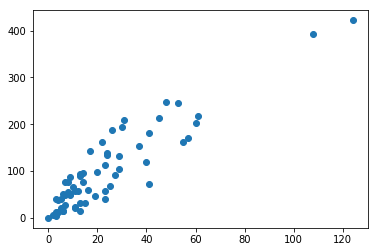

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter( data["claim_count"],data["claim_value"])

Linear Regression has already solve this problem for us - we just didn't realize it yet. The parameters ( also called co-efficients )

- slope
- intercept  

are the solution. 

[19.99448576] [429.65331297]


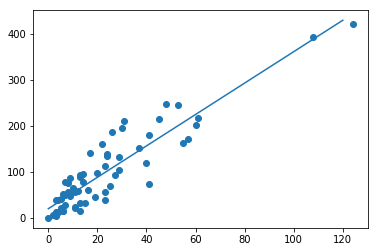

In [12]:
point_1 = slope*0 + intercept
point_2 = slope*120 + intercept

print ( point_1, point_2)

plt.scatter( data["claim_count"],data["claim_value"])
plt.plot([0,120], [point_1,point_2])

How did we get the straight line ?

<img src="./pics/y_mx_b.png"/>

A straight line can be defined mathematically using

Y = a X + b

where a is called the slope of the line and b is called the intercept. These are also called coefficients. The **fit** function of _LinearRegression_ has already arrived at these numbers ( slope and intercept ). It has done so based on the data

In [13]:
slope       = model.coef_
intercept   = model.intercept_

print ( "a (slope)     = ",slope)
print ( "b (intercept) = ", intercept)

a (slope)     =  [3.41382356]
b (intercept) =  19.99448575911478


#### What did we achieve ?

What we have essentially done is predicted a relationship between the number of claims and the total amount paid. For example, what is the total amount expected to be paid when the number of claims is 80 ?

<img src="./pics/predict_claims_value.png"/>

Easy, right ?

#### Prediction

We don't have to draw lines like this every time to predict the value of Y for a value of X. You can use the **predict ( )** function.

In [14]:
claim_values = model.predict (data[["claim_count"]])

or more specifically, 

In [15]:
claim_values = model.predict (pd.DataFrame([10,20,30,40,60]))

In [16]:
claim_values

array([ 54.13272136,  88.27095696, 122.40919256, 156.54742816,
       224.82389936])

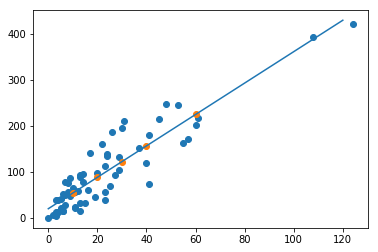

In [17]:
plt.scatter( data["claim_count"],data["claim_value"])
plt.plot([0,120], [point_1,point_2])

plt.scatter([10,20,30,40,60], claim_values , marker='o')

What were the original values though ? You can pick them up from the CSV. 

<img src="./pics/insurance_claims_actual_values.png"/>

In [18]:
original_claim_values = [65.3,98.1,194.5,119.4,202.4]

Let's also plot these to compare how well we predicted.

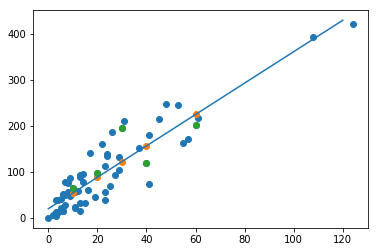

In [19]:
plt.scatter( data["claim_count"],data["claim_value"])
plt.plot([0,120], [point_1,point_2])

plt.scatter([10,20,30,40,60], claim_values , marker='o')
plt.scatter([10,20,30,40,60], original_claim_values , marker='o')


Some values are pretty close, some are a bit off - but nevertheless its a good prediction for the amount of time we spent doing it. 

### How did LinearRegression fit the straight line

The fun starts now. How did the **LinearRegression ( )** function fit the straight line ? How did it it arrive at this equation

Y = 3.4 X + 19.99

Obviously, there is no one straight line that will pass through all the points in this case.

<img src="./pics/best_fit.png"/>

If you take these 4 data points, we can eyeball a straight line that goes through the middle of it. The ones marked with question marks are visually not a good fit at all. But the question that linear model tries to solve is,

> What is the **"Optimum"** straight line that best describes the relationship between X and Y

This is where statistics comes in.

#### Let's zoom in

Let's simplify and make up some numbers ( for easy calculation) of claims vs payments. Say we have a set of 5 data points for claims vs payments and we wish to fit a linear model that can predict further data. This is a very small data set to do anything practical, but there is a reason why we are doing such a small data set as we will see in the coming sections.

<img src="./pics/claism_data.png"/>

Let's plot these on a graph.

<img src="./pics/claims_vs_payments.jpg"/>

If we were asked to eyeball a straight line that best fits these data points, this is how we would do it.

<img src="./pics/approximate_line.png"/>

How did we do it ? Our eye is essentially trying to **minimize the distances** from each of these points to the straight line. The best fitting straight line is one which minimizes the distances for all these points.

Linear regression in machine learning does exactly that - Instead of a human eye, machine learning takes the help of statistics to do this approximation. There are a couple of methods to do this in statistics.

- Ordinary Least Squares
- Gradient Descent

Let's explore the first method here.

#### Residuals

When we tried to minimize the distance of each of these points from the line we are trying to fit, the distances between the points and the straight line ( on the y axis ) are called **residuals**.

<img src="./pics/residuals.png"/>

#### Sum of Squares

**Warning - Geeky Statistics stuff**

To arrive at the best fit values for the straight line, statisticians have arrived at the following formula based on the method of least squares. How they arrived at it is pretty geeky and let's leave that to the statisticians.

<img src="./pics/equation.png"/>

This equation sounds scary, but it is not. I am going to prove it to you in a minute down below. There are 2 things in this equation that require an explanation.

- The weird symbol that looks like a knocked up W . It is used for summation.
- y with a bar on it ( or x with a bar ). The bar just represents the average. So y with a bar on it represents the average.

Let's take the same numbers that we have above and try to calculate the formula by hand. Excel would make things easy, but let's just do it manually, since the numbers are not all that bad.

<img src="./pics/b_calculation.png"/>

That was huge - Now we can easily calculate a and b from the Y = a + b X equation.

**Validation**

Let's cross validate this equation.

In [26]:
sample = pd.DataFrame( {'x' : [20,40,60,80,100],'y':[40,60,80,80,90]})

In [27]:
sample

,x,y
0,20,40
1,40,60
2,60,80
3,80,80
4,100,90


Let's model this data and plot it

In [29]:
model.fit(sample[["x"]],sample["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

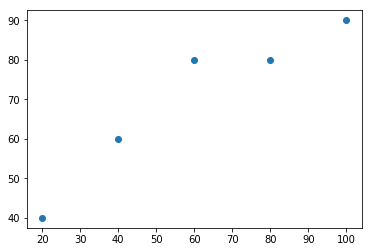

In [30]:
plt.scatter( sample["x"],sample["y"])

Now, let's use our model to visualize the fit

In [31]:
slope       = model.coef_
intercept   = model.intercept_

print ( "a (slope)     = ",slope)
print ( "b (intercept) = ", intercept)

a (slope)     =  [0.6]
b (intercept) =  34.0


These are the slope and intercept values. We can now use these to plot the fit line.

[34.] [106.]


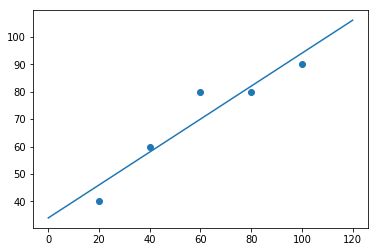

In [32]:
point_1 = slope*0 + intercept
point_2 = slope*120 + intercept

print ( point_1, point_2)

plt.scatter( sample["x"],sample["y"])
plt.plot([0,120], [point_1,point_2])

The model object has a whole host of other information that you can use to predict how good of a fit the line is to the data. But first, let's predict the value in a table.

In [34]:
pred_y = model.predict (sample[["x"]])
pred_y

array([46., 58., 70., 82., 94.])

The differences ( residuals ) are highlighted below. 

<img src="./pics/residuals_visualized.png"/>

There are so many other parameters ( like the **p-value**, **r-squared**, **r-squared adjusted** ) and graphs ( **Residuals vs fitted** , **Q-Q Plot** etc ) that are used to analyze the performance of a model fit. We are going to get to that in the next section. To set the stage for these parameters, let's scale up our data set.

### Boston Housing dataset

Predicting the price of a house is based on many parameters like the size, neighborhood, crime rate, pollution etc. Essentially, there is no mathematical equation that can predict the price of a house based on these parameters - that's essentially where ML comes into the picture.

In the earlier example, we just had to predict the value of **Y** given a value of __X__. There is just 1 predictor ( X ). However, let's have a look at the Boston Housing data set - tons of variables. Load the data first.



There are a couple of ways to load the data.

- Download it from <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/">UCI ML repository</a>
- Download it from this website
- Load it straight from scikit-learn library

#### Download and load from file system

In [3]:
import pandas as pd

boston_housing = pd.read_csv("../data/boston_housing.csv")
boston_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


The attribute names are a bit cryptic. So, here are the descriptions. 

- **CRIM**      per capita crime rate by town
- **ZN**        proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**     proportion of non-retail business acres per town
- **CHAS**      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**       nitric oxides concentration (parts per 10 million)
- **RM**        average number of rooms per dwelling
- **AGE**       proportion of owner-occupied units built prior to 1940
- **DIS**       weighted distances to five Boston employment centres
- **RAD**       index of accessibility to radial highways
- **TAX**       full-value property-tax rate per USD - 10,000
- **PTRATIO**  pupil-teacher ratio by town
- **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**    % lower status of the population
- **MEDV**     Median value of owner-occupied homes in USD 1000's

#### Load it directly from scikit learn module

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
type(boston)

sklearn.utils.Bunch

**bunch** is a scikit learn object used for loading in-built data packages - like Boston Housing or Iris. To view the data, just do

In [7]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

Since all of the data is numeric in nature, it is set up as a NumPy object. What else is available ? The Bunch object is more or less like a dictionary. so, you can use the **keys ( )** method to get all the keys. 

In [8]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Now, let's see the features

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

How large is the dataset ? 

In [10]:
boston.data.shape

(506, 13)

so, it is 506 rows and 13 columns. 

And here is the description of what these columns represent. 

In [14]:
print ( boston.DESCR )
# The reason why we are doing print is because the DESCR value is a formatted string ( with new line characters like \n etc)
# otherwise, you get unformatted text

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

If you observe closely, the actual price column ( MEDV ) that you see in the loaded file ( from pandas.read_csv() ) previously is missing in the scikit learn data. That is because it is available as a separate key in the scikit learn Bunch called **target**. Let's see that as well. 

In [15]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Let's create a Pandas dataframe from this data as well for further analysis. 

In [2]:
boston_housing = pd.DataFrame(boston.data)

# set the columns
boston_housing.columns = boston.feature_names

# add the price
boston_housing["MEDV"] = boston.target

# now, look at the head
boston_housing.head()

NameError: name 'pd' is not defined

Alright, now that we know how to get the dataframe ( via file upload or scikit learn library itself ), let's quickly do a linear regression on this data. 

##### Response Variable vs Predictor

What is the problem we are trying to solve ? We are actually trying to predict the Median house price based on a variety of parameters - like Crime rate, Nitric Oxide content in the air, age of the house etc. Each of these parameters have a "say" in the price of the house. The target variable is valled the **Response Variable** and the parameters that have a "say" in determining the target variable are called the **Predictors**.

In our case, there are 12 predictors ( CRIM, ZN, INDUS...LSTAT) and 1 response variable ( MEDV ). Just for simplicity sake, let's just pick one parameter - **rm** - the number of rooms in the house. Let's see how well we predict the price of the house based on just this one parameter.

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit( boston_housing[["RM"]], boston_housing["MEDV"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's plot our prediction. 

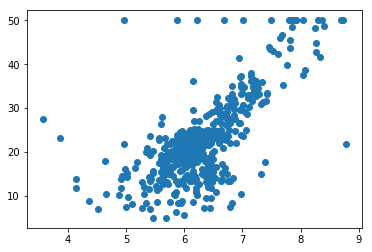

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(boston_housing["RM"], boston_housing["MEDV"])

Now, let's draw the straight line that our model has predicted. The maximum number of rooms in our data is 9 and the minimum is 0. so, let's determine the co-ordinates to draw our fit line. 

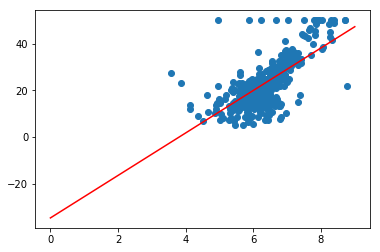

In [21]:
slope       = model.coef_
intercept   = model.intercept_

point_1 = slope*0 + intercept
point_2 = slope*9 + intercept

plt.scatter(boston_housing["RM"], boston_housing["MEDV"])
plt.plot([0,9], [point_1,point_2],color="r")

Looks like a decent enough fit. Let's do another - **lstat** - lower status population percentage. 

**Step 1 - Model the data**

In [31]:
model.fit( boston_housing[["LSTAT"]], boston_housing["MEDV"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Step 2 - Determine the slope and intercept from the model**

In [32]:
slope       = model.coef_
intercept   = model.intercept_

point_1 = slope*0 + intercept
point_2 = slope*9 + intercept

**Step 3 - Plot the data and fit line **

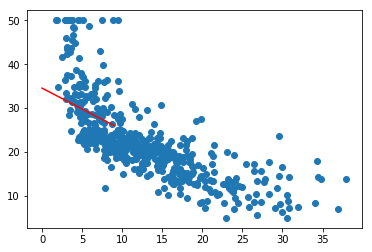

In [33]:
plt.scatter(boston_housing["LSTAT"], boston_housing["MEDV"])
plt.plot([0,9], [point_1,point_2],color="r")

The line seems off, right ? Why is that ? How did we determine the points ? (Based on the older data - number of rooms). The range of data for LSTAT on the other hand starts at 0 and ends at 40. So, lets re-determine the line. 

In [34]:
slope       = model.coef_
intercept   = model.intercept_

point_1 = slope*0 + intercept
point_2 = slope*40 + intercept

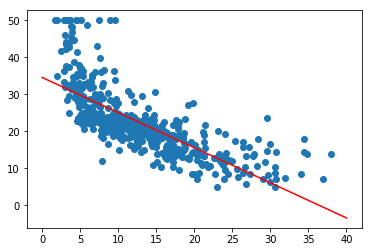

In [35]:
plt.scatter(boston_housing["LSTAT"], boston_housing["MEDV"])
plt.plot([0,40], [point_1,point_2],color="r")

This seems accurate enough. However, if you look at both these graphs, the relationship between the predictors and response variable seems a bit different between the predictor LSTAT vs RM. Let's put these graphs side by side to understand better. 

<img src="./pics/lstat_medv.png" style="background-color:white"/><img src="./pics/rm_medv.png" style="background-color:white"/>

The first picture is lstat vs medv and the second is rm vs medv. 

<img src="./pics/lstat_rm_medv.png"/>

Also, not all variables might be relevant ( irrespective of the direction, decrease or increase ). Let's take the parameter dis - distance to employment. Once again, if we try to fit this using our steps

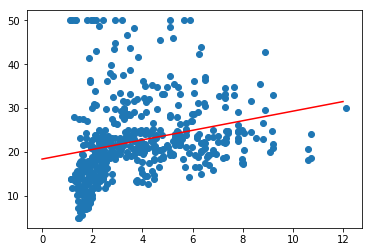

In [42]:
# step 1
model.fit( boston_housing[["DIS"]], boston_housing["MEDV"])

# step 2
slope       = model.coef_
intercept   = model.intercept_

point_1 = slope*0 + intercept
point_2 = slope*12 + intercept

# step 3
plt.scatter(boston_housing["DIS"], boston_housing["MEDV"])
plt.plot([0,12], [point_1,point_2],color="r")

Visually, there is not much of a linear relationship between distance and median value ( although we tried to fit it ). How exactly do we measure the relationship ?

### Correlation

This is the simplest measure of relation between 2 numeric variables. Luckily, pandas provides a built-in method for calculating correlation - **corr ( )**. For example,

In [43]:
boston_housing["MEDV"].corr(boston_housing["DIS"])

0.24992873408590394

Correlation values are calculated to values between 0 and 1. Technically, the values can vary between -1 and +1. 0 being no correlation and 1 being highly correlated ( -1 also signifies a high correlation, just that it is a negative correlation , meaning if the predictor values increases, the response value decreases). In the example above, the relationship between distance and median value is just 24 %. How about others predictors ?



In [44]:
boston_housing["MEDV"].corr(boston_housing["RM"])

0.6953599470715391

In [45]:
boston_housing["MEDV"].corr(boston_housing["LSTAT"])

-0.7376627261740147

This seems in-line with our plots above right ?


### p value

In [ ]:
Also called probability value, p-value answers the following question -

> **If a predictor is relevant to predict the response and if yes, how relevant is it ?**

We have to understand p-value in the context of Null Hypothesis.



#### Null Hypothesis

Null hypothesis (denoted as **H<sub>0</sub>** assumes that there is no relationship between the predictor and the response variable. For example, if you look at the relationship between the number of rooms ( rm ) and the median price value of the home ( medv ) in the Boston Housing dataset, Null hypothesis says that there is NO relationship between them.



<img src="./pics/rm-medv.png"/>

Well, although we can see a linear relationship visually ( almost ) between those 2 variables, we start off with the Null Hypothesis. It is indicated in statistics as **H<sub>0</sub>** 



Alternate hypothesis indicates that they are related. It is indicated as **H<sub>1</sub>** . P-value indicates how much the observed data is inconsistent with the Null Hypothesis. This is a bit cryptic, right ? Let's explore this further.



Let's just consider 2 random variables that are normally distributed. Since they are random variables, there would be no relationship between them, right ? Let's check it out.



**Dataset 1**

A normal distribution of 100 values with a mean of 100 and sd of 20


In [51]:
import numpy as np

x = np.random.normal(100, 20, 20)
x

array([ 91.64973412, 109.32304767,  93.9077676 , 105.24405572,
       109.95742642, 104.85157705,  79.36556476, 106.15237648,
       134.17386516, 139.82031032,  82.66192429, 100.23685804,
        99.57295153, 127.87697754, 126.32897135,  87.31944582,
        91.30163773, 107.71736601,  72.51234899, 118.62316221])

**Dataset 2**

Another normal distribution of 100 values with a mean of 100 and sd of 20


In [52]:
y = np.random.normal(100, 20, 20)
y

array([115.22858397, 113.51179658,  62.25412103,  81.838377  ,
        94.31343936,  89.45654237, 114.43156241,  98.09960278,
       100.03463311, 113.47463086,  93.06795158,  55.79362936,
        53.21061632, 107.47367928,  87.54403807,  94.9882873 ,
       143.20548377, 112.28885607, 115.2954887 ,  92.15780964])

Let's plot **x** vs __y__ and see how it looks.



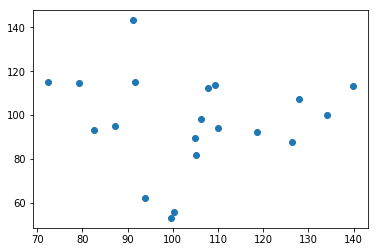

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x,y)

This almost looks like the night sky, isn't it ? Point being, there is no relationship between **x** and __y__ as they are random variables - That is pretty understandable right ? Let's try to calculate a relationship between these two variables ( although there is none ) and see how it compares against another situation where there IS actually a relationship.



In [54]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Step 1 - Model
model = LinearRegression()

model.fit( pd.DataFrame(x), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

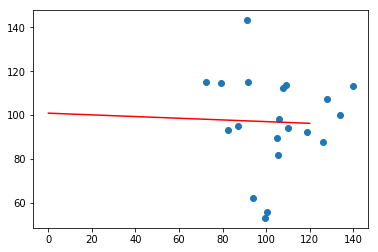

In [55]:
# step 2
slope       = model.coef_
intercept   = model.intercept_

point_1 = slope*0 + intercept
point_2 = slope*120 + intercept

# step 3
plt.scatter(x, y)
plt.plot([0,120], [point_1,point_2],color="r")

What is the **p-value** in this case ?



Unfortunately, the standard scikit learn's LinearRegression() object does not provide p-value. There are other libraries that can help us with determining the p-value. For example, let's use the **scipy** library.

In [58]:
from scipy import stats
import numpy as np

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_value

0.8940519006423479

And the **p-value** in this case is 0.89. 

p-value is 0.89 - that's 89 %. p-value is always between 0 and 1. 0.89 is a big number right ? Does it indicate that there is a strong relationship between x and y in this case ? On the contrary, a high p-value indicates that the there is NO relationship between x and y - which is what the Null Hypothesis states.

On the other hand, if we calculate the p-value of the relationship between the number of rooms ("RM") and median price ("MEDV"), then you get a very small value. 

In [61]:
from scipy import stats
import numpy as np

slope, intercept, r_value, p_value, std_err = stats.linregress(boston.data[:,5],boston.target)

In [62]:
p_value

2.4872288710080936e-74

p-value in this case is 2.487 x 10<sup>-74</sup>. That is an extremely low value ( 0.0000..00248 ) . 

> What it means is that there is a 0.0000..00248 % chance that the correlation is random.  

or in other words, there is a 99.99999 % chance that the data does represent a relationship between the two variables. Whereas in the case of the random variales, there is a 89% chance that the correlation is random

### Optimum p-value

A value below which we can safely conclude that the relationship between 2 variables did not happen by chance, but because there is a true causal relationship, is called an optimum p-value.  

> Is there a fixed p-value below which, we can safely conclude a strong relationship (Alternate Hypothesis) ?

Typically p <= 0.05 is accepted in most cases. However, the actual value at which the business is comfortable is based on a variety of parameters like 
- type of data
- level of confidence the business requires etc

## r-squared - r2

R-squared is a measure of the explanatory power of the model - How well are the variables able to explain the response variables using the model. A model's r<sup>2</sup> varies between 0 and 1. 

In [3]:
from scipy import stats
import numpy as np

slope, intercept, r_value, p_value, std_err = stats.linregress(boston.data[:,5],boston.target)
print ( "r-squared = ",r_value**2)

NameError: name 'boston' is not defined

In the example above, we tried to model the response variable medv ( median house value ) as a measure of the number of rooms ( rm ) - the r<sup>2</sup> value is 0.4835 . It is a measure of how well the model explains the relationship. A low value of r<sup>2</sup> ( r<sup>2</sup> = 0 ) means that the explanatory variables are not able to predict the response variable well

In [4]:
import numpy as np

x = np.random.normal(100, 20, 20)
y = np.random.normal(100, 20, 20)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ( "r-squared = ",r_value**2)

r-squared =  0.0789404003519033


For example, if you look at the random value example, the r<sup>2</sup> value is 0.00725 - which is very close to 0. What this means is that the explanatory variable (x) is not able to explain the variance in the response variable (y). 

A high value or r<sup>2</sup> ( r<sup>2</sup>= 1 ) means that the explanatory variables are fully able to predict the response - In this case the number of rooms ( rm ) is able to explain the variance in the median house value around 48 %. The remaining 52% variance is unexplained by the explanatory variable. 

## How is r2 calculated

The formula to calculate r<sup>2</sup> is 

<img src="./pics/r2-calculation.png"/>

Let's calculate r<sup>2</sup> by hand for our simple dataset. 

<img src="./pics/r_squared_for_simple_data.png"/>

Let's verify this in Python.

In [7]:
x = [20,40,60,80,100]
y = [40,60,80,80,90 ]

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ( "r-squared = ",r_value**2)

r-squared =  0.8999999999999999


There you go - our manual calculation verifies with Python's calculation. 

## r-squared adjusted 

Mathematically, r<sup>2</sup> has a peculiar property. Adding more predictors increases the value of r<sup>2</sup> . This is not very intuitive to begin with. Let's try it on our Boston Housing dataset. 

In the example above, we have tried to model medv from rm . So, the only explanatory variable is rm ( number of rooms ). Based on that relationship we have an r<sup>2</sup> value of 0.4835 . What would happen if we add another explanatory variable ? - say lstat ( percentage of lower status of the population ). Unfortunately, scipy's **scipy.stats.linregress** or __sklearn.metrics.r2_score__ cannot deal with more than 1 predictor. For that you need a new library called **statsmodels**. Just install it using pip or conda. 

<pre>
> pip install statsmodels
</pre>

First, let's calculate R-squared from just the number of rooms ( 6th column )

In [85]:
import numpy as np
import statsmodels.api as sm

x = boston.data
y = boston.target

model       = sm.OLS( y, x[:,[5]] )
model_fit   = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Wed, 24 Apr 2019   Prob (F-statistic):          3.74e-256
Time:                        11:18:22   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.6534      0.054     67.930      0.0

r<sup>2</sup> is 0.901. Now, let's see what happens if we add another predictor, say **lstat** - percentage of lower stata people in the community. 

In [83]:
# Number of rooms ( 6th column )
# lstat is the 12th column
model       = sm.OLS( y, x[:,[5,12]] )
model_fit   = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     4637.
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:08:09   Log-Likelihood:                -1582.9
No. Observations:                 506   AIC:                             3170.
Df Residuals:                     504   BIC:                             3178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.9069      0.070     69.906      0.0

r<sup>2</sup> was previously 0.901. Now, after adding another predictor ( lstat ), the r<sup>2</sup> became 0.948. Let's add one more predictor - the amount of Nitric Oxide in the air ( NOX )

In [84]:
# Number of rooms ( 6th column )
# lstat is the 12th column
# Nox is the 4th column. 
model       = sm.OLS( y, x[:,[4,5,12]] )
model_fit   = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     3089.
Date:                Wed, 24 Apr 2019   Prob (F-statistic):          1.48e-323
Time:                        11:09:09   Log-Likelihood:                -1582.6
No. Observations:                 506   AIC:                             3171.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.0055      2.558     -0.784      0.4

Here is how the r<sup>2</sup> value changed as we kept on adding predictors.

**r<sup>2</sup> value - Predictors<br>**
0.901 - number of rooms <br>
0.948 - number of rooms + lower stata population<br>
0.949 - number of rooms + lower stata population + Nitric Oxide in the air<br>

    

**r2 adjusted value - Predictors** <br>
0.901 - number of rooms <br>
0.948 - number of rooms + lower stata population <br>
0.948 - number of rooms + lower stata population + Nitric Oxide in the air

As we know r<sup>2</sup> represents the explanatory power of the model. Does it mean that adding more predictors is increasing the predictive power of th model ? Not necessarily. That's where r<sup>2</sup> adjusted comes in. For example, when we added NOX ( Nitric Oxide in the air ) as the 3rd predictor, the r<sup>2</sup> has increased from 0.948 to 0.949, but the r<sup>2</sup> adjusted value has remained the same ( 0.948 ) in both the cases. 

What it goes to show is that, adding more predictors does not necessarily increase the explanatory power of the model. r<sup>2</sup> adjusted accommodates for this by incorporating a penalty for the number of predictors ( more the predictors, lesser the r<sup>2</sup> adjusted ). The formula for r<sup>2</sup> adjusted is 

<img src="./pics/r-squared-adjusted.png"/>

where
- n = sample size
- p = number of predictors
